In [1]:
from random import randrange, choice
from itertools import combinations
import random
import math
import re
from random import randint

In [2]:
def initialState(seqList):
    lenList = [len(seq) for seq in seqList]
    maxSize = max(lenList)
    maxPos = lenList.index(maxSize)
    sol = []
    for i in range(len(seqList)):
        newSeq = seqList[i]
        while(len(newSeq) != maxSize):
            randomPos = randrange(len(newSeq) + 1)
            newSeq = newSeq[:randomPos] + "-" + newSeq[randomPos:]
        sol.append(newSeq)
    return sol

In [3]:
def scoreOfList(seqList):
    pairs = list(combinations(seqList, 2))
    score = 0
    for pair in pairs:
        score += findScore(pair)
    return score

In [4]:
def findScore(pair):
    seqOne = pair[0]
    seqTwo = pair[1]
    score = 0
    for i in range(len(seqOne)):
        if seqOne[i] != seqTwo[i] :
            score += 1
    return score

In [5]:
l = ["GARFIELDTHELASTFATCAT", "GARFIELDTHEFASTCAT", "GARFIELDTHEVERYFASTCAT", "THEFATCAT", "GARFIELDTHEVASTCAT"]

In [6]:
def nextState(seqList):
    res = []
    for seq in seqList:
        switcher = {1: swap(seq), 2: insert(seq), 3: delete(seq)}
        res.append(switcher[randint(1,3)])
    return res

In [7]:
def delete(seq):
    rgxIter = re.finditer('^-|[^-]-',seq)
    try:
        start = next(rgxIter).end() - 1
    except:
        return seq
    
    while True:
        cntinu = choice([True, False])
        if cntinu:
            break
        else:
            try:
                start = next(rgxIter).end() - 1
            except:
                return seq
    tmp = start
    while tmp != len(seq) and seq[tmp] == '-':
        tmp += 1
    end = tmp
    k = randint(1, len(range(start, end)))
    out = list(seq)
    out[start:start+k] = ''
    out.append('-'*k)
    return ''.join(out)

In [8]:
def insert(seq):
    rgxIter = re.finditer('^-|[^-]-',seq)
    try:
        start = next(rgxIter).end() - 1
    except:
        return seq
    
    while True:
        cntinu = choice([True, False])
        if cntinu:
            break
        else:
            try:
                start = next(rgxIter).end() - 1
            except:
                return seq
    tmp = start
    while tmp != len(seq) and seq[tmp] == '-':
        tmp += 1
    end = tmp
    k = randint(1, len(range(start, end)))
    out = list(seq)
    out[start:start+k] = ''
    out.insert(randrange(len(out)), '-'*k)
    return ''.join(out)

In [9]:
def swap(seq):
    nullPosList = [i for i, char in enumerate(seq) if char == "-"]
    if  len(nullPosList) == 0: return seq
    j = choice(nullPosList)
    direction = choice(['l', 'r'])
    res = ""
    if direction == 'l':
        startPos = j
        while(seq[startPos] == '-' and startPos >= 0):
            startPos -= 1
        startPos += 1
        k = 0 if (len(seq[:startPos]) == 0) else randrange(len(seq[:startPos])) + 1
        charStartPos = startPos - k
        res = seq[:charStartPos] + seq[startPos:j+1] + seq[charStartPos:startPos] + seq[j+1:]
    else:
        endPos = j
        while(endPos<len(seq) and seq[endPos] == '-'):
            endPos += 1
        endPos -= 1
        k = 0 if (len(seq[endPos:]) == 0) else randrange(len(seq[endPos:])) + 1
        charEndPos = endPos + k
        res = seq[:j] + seq[endPos+1:charEndPos+1] + seq[j:endPos+1] + seq[charEndPos+1:]   
    return res

In [10]:
def simulatedAnnealing(currSeq):
    listOfScores = []
    listOfScores.append(scoreOfList(currSeq))
    currentTemp = 1
    tempLimit = 0.0001
    while(currentTemp > tempLimit):
        neighbourSeq = nextState(currSeq)
        if(scoreOfList(neighbourSeq) < scoreOfList(currSeq)):
            currSeq = neighbourSeq
            listOfScores.append(scoreOfList(neighbourSeq))
        else:
            exp = math.pow(math.e,(scoreOfList(currSeq)-scoreOfList(neighbourSeq))/currentTemp)
            if(exp > random.random()):
                currSeq = neighbourSeq
                listOfScores.append(scoreOfList(neighbourSeq))
        currentTemp = currentTemp*0.99999
    return currSeq,scoreOfList(currSeq),listOfScores

In [11]:
ans = initialState(l)
print(ans)
print(scoreOfList(ans))
finalSeq,finalScore,listOfScores = simulatedAnnealing(ans)

['GARFIELDTHELASTFA-TCAT', 'G-ARFIELD-THEFASTC--AT', 'GARFIELDTHEVERYFASTCAT', 'TH-EFA---T-----CAT----', '-GARFIE-LDT-HEVAS-TCAT']
171


In [12]:
print(finalSeq)
print(finalScore)

['GARFIELDTHELASTFA-TCAT', 'GARFIELDTHE----FASTCAT', 'GARFIELDTHEVERYFASTCAT', '--------THE----FA-TCAT', 'GARFIELDTHE----VASTCAT']
70


In [13]:
print(listOfScores)

[171, 150, 145, 144, 144, 138, 123, 115, 113, 110, 110, 109, 110, 110, 110, 110, 110, 110, 111, 111, 111, 111, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 108, 108, 109, 109, 109, 109, 108, 106, 106, 106, 105, 106, 106, 111, 111, 111, 110, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 102, 102, 102, 102, 100, 100, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 88, 88, 88, 88, 88, 88, 88, 87, 87, 90, 90, 90, 90, 90, 90, 90, 89, 90, 90, 90, 90, 

Text(0.5, 1.0, 'Simulated Annealing')

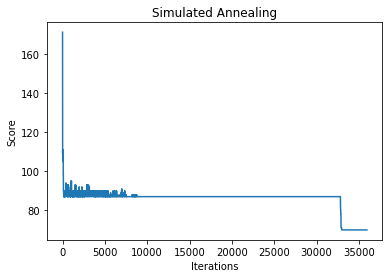

In [14]:
import matplotlib.pyplot as plt
x = list(range(1,len(listOfScores)+1))
plt.plot(x, listOfScores)
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.title('Simulated Annealing')